In [2]:
import pandas as pd
import numpy as np


df = pd.read_csv('fitness_data.csv')


print("Missing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
WorkoutID          0
WorkoutType        0
DurationMinutes    0
CaloriesBurned     0
DifficultyLevel    0
dtype: int64


In [2]:
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")


Number of duplicate rows: 0
Number of rows after removing duplicates: 500


In [3]:
print("\nData types before correction:")
print(df.dtypes)




Data types before correction:
WorkoutID           int64
WorkoutType        object
DurationMinutes     int64
CaloriesBurned      int64
DifficultyLevel    object
dtype: object


In [4]:
Q1 = df['DurationMinutes'].quantile(0.25)
Q3 = df['DurationMinutes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['DurationMinutes'] < lower_bound) | (df['DurationMinutes'] > upper_bound)]
print(f"\nNumber of outliers in DurationMinutes: {len(outliers)}")


Number of outliers in DurationMinutes: 12


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


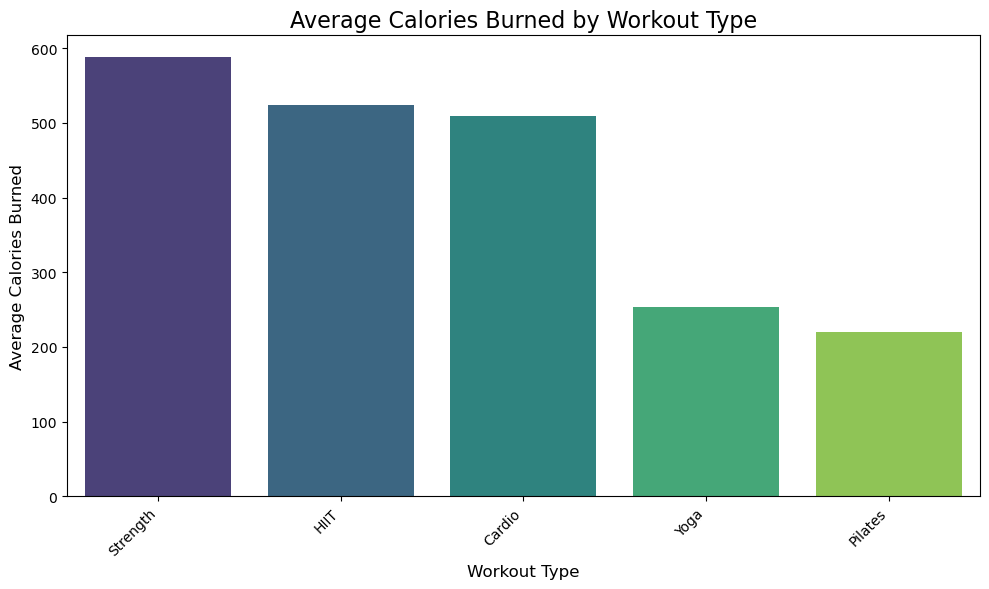

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('fitness_data.csv')

plt.figure(figsize=(10, 6))
avg_calories = df.groupby('WorkoutType')['CaloriesBurned'].mean().sort_values(ascending=False)
sns.barplot(x=avg_calories.index, y=avg_calories.values, hue=avg_calories.index, palette='viridis', legend=False)
plt.title('Average Calories Burned by Workout Type', fontsize=16)
plt.xlabel('Workout Type', fontsize=12)
plt.ylabel('Average Calories Burned', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() 

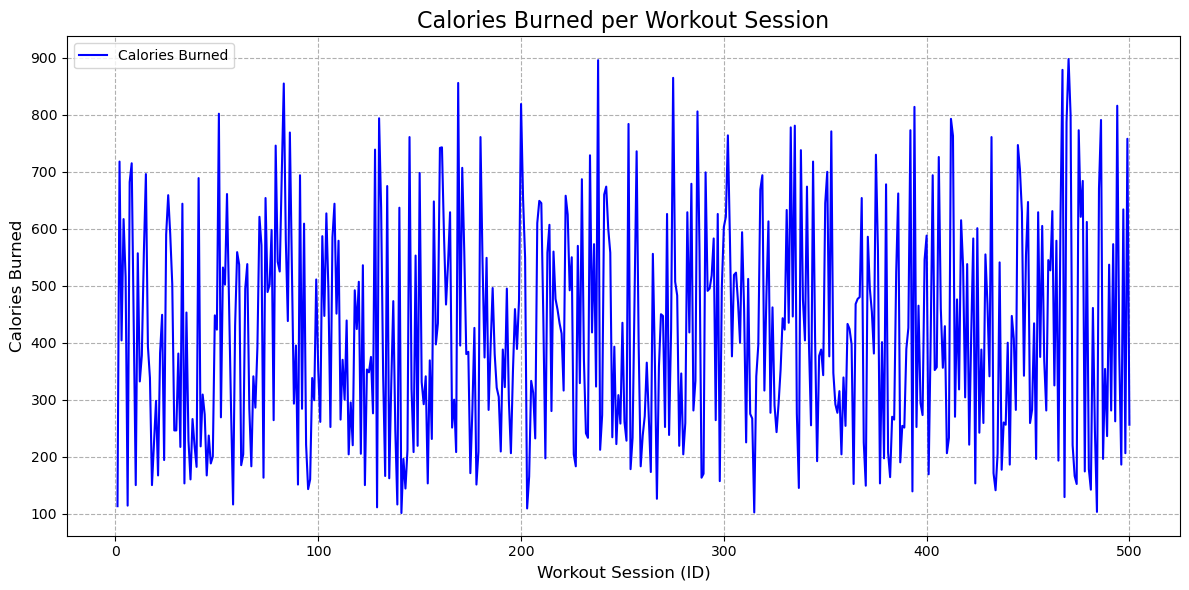

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fitness_data.csv')
plt.figure(figsize=(12, 6))
df_sorted_by_id = df.sort_values(by='WorkoutID')
plt.plot(df_sorted_by_id['WorkoutID'], df_sorted_by_id['CaloriesBurned'], label='Calories Burned', color='blue')
plt.title('Calories Burned per Workout Session', fontsize=16)
plt.xlabel('Workout Session (ID)', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

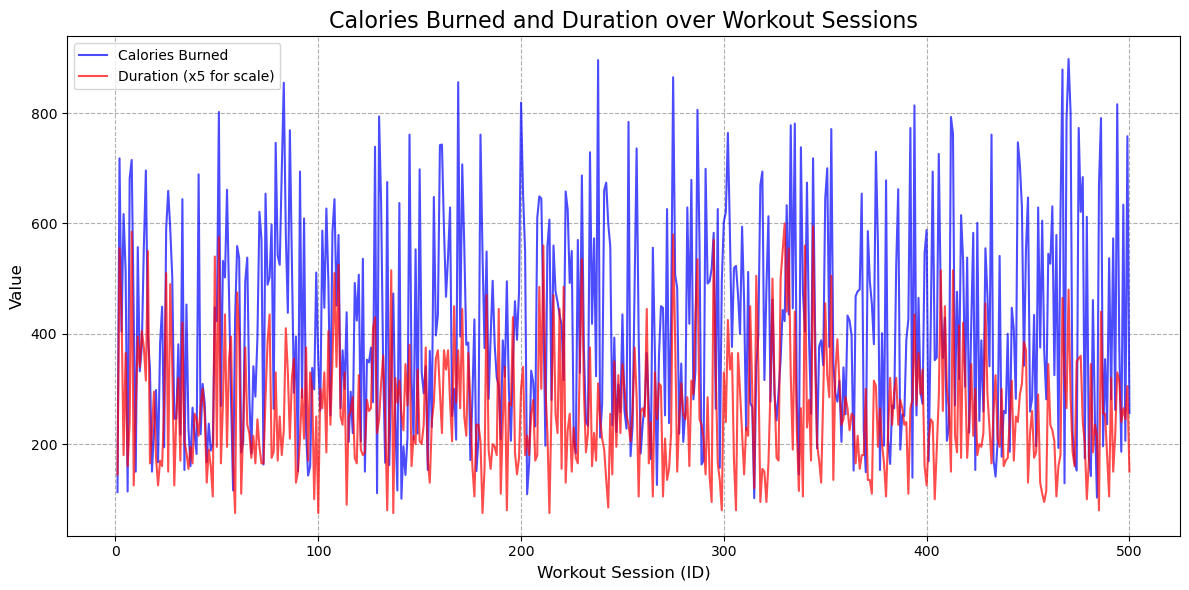

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.plot(df_sorted_by_id['WorkoutID'], df_sorted_by_id['CaloriesBurned'], label='Calories Burned', color='blue', alpha=0.7)
plt.plot(df_sorted_by_id['WorkoutID'], df_sorted_by_id['DurationMinutes'] * 5, label='Duration (x5 for scale)', color='red', alpha=0.7)
plt.title('Calories Burned and Duration over Workout Sessions', fontsize=16)
plt.xlabel('Workout Session (ID)', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

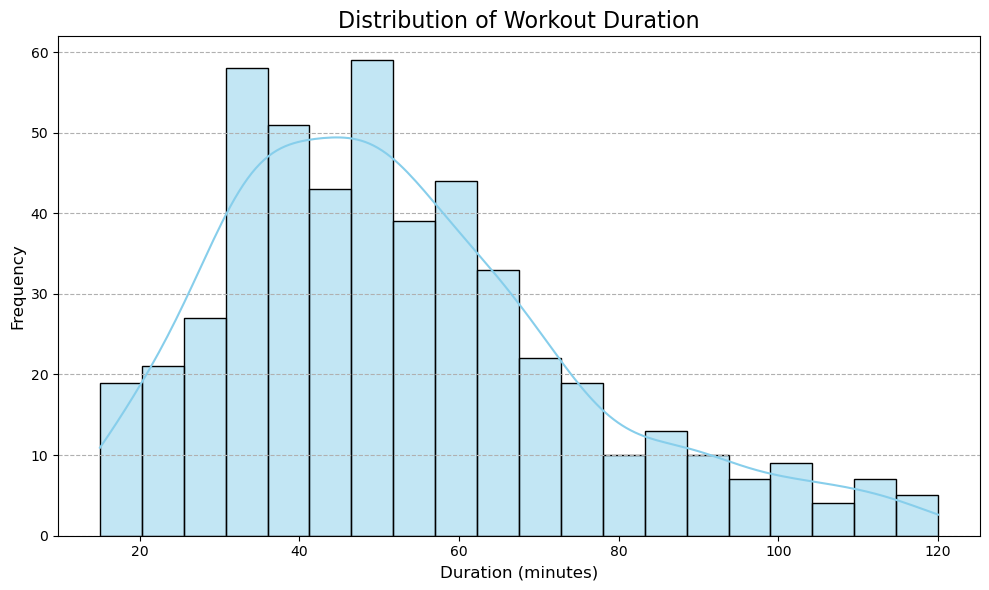

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['DurationMinutes'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Workout Duration', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

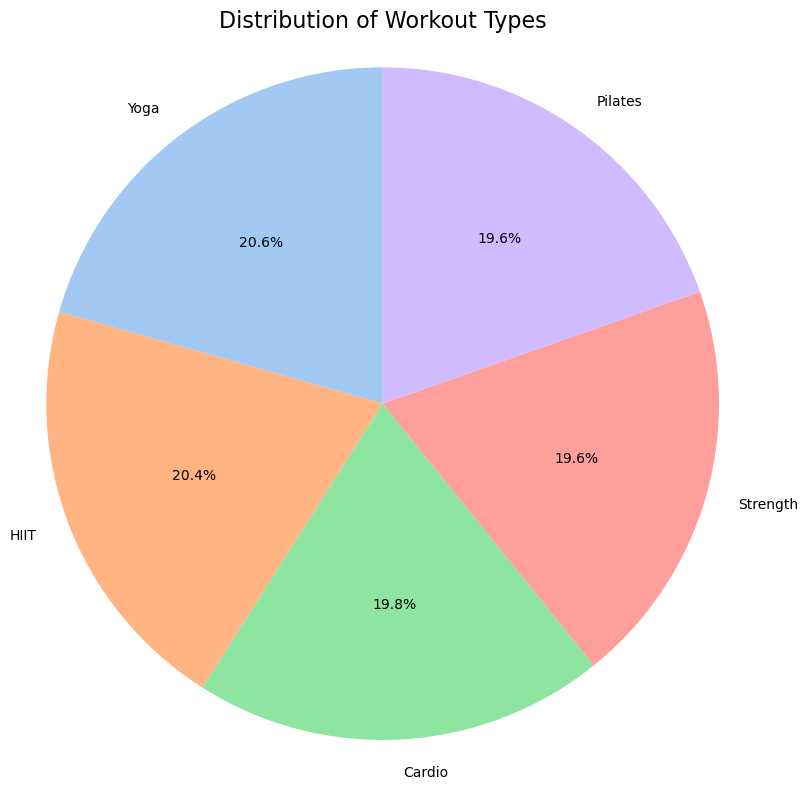

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))
workout_counts = df['WorkoutType'].value_counts()
plt.pie(workout_counts, labels=workout_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Workout Types', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

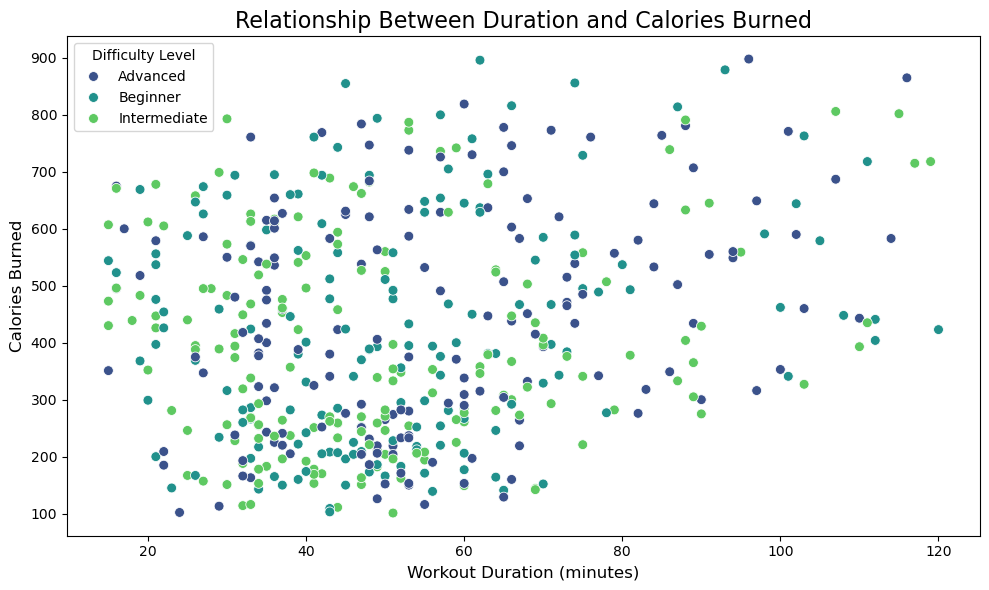

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DurationMinutes', y='CaloriesBurned', hue='DifficultyLevel', data=df, palette='viridis', s=50)
plt.title('Relationship Between Duration and Calories Burned', fontsize=16)
plt.xlabel('Workout Duration (minutes)', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.legend(title='Difficulty Level')
plt.tight_layout()
plt.show()